In [4]:
%aiida

Loaded AiiDA DB environment - profile name: scanlon-test.

In [5]:
import matplotlib.pyplot as plt

import pandas as pd
from aiida.orm import StructureData
import matplotlib.pyplot as plt

## Create HvsV plot using data stored 

In [6]:
plt.style.use('publication_mp_style')
plt.rcParams['figure.dpi'] = 150

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Whitney Book Extended, Catamaran, Liberation Sans, Andale Sans, Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica, Whitney Book Extended, Catamaran, Liberation Sans, Andale Sans, Arial


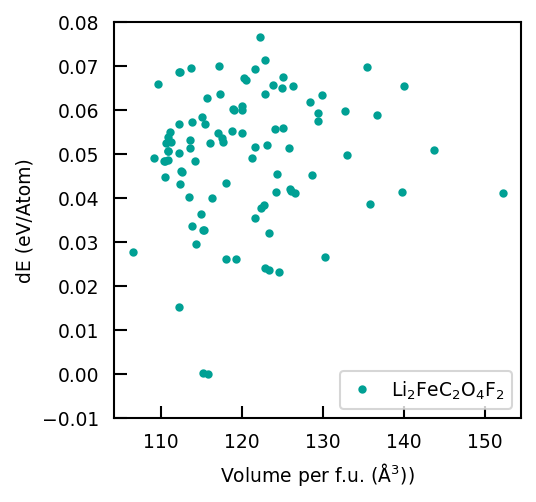

In [7]:
group = Group.objects.get(label='oxalates-f/li2feoxf2-migrated-v2')
q = QueryBuilder()
q.append(Group, filters={'id': group.id})
q.append(Node, tag='root', with_group=Group)
q.append(Dict, tag='misc', project=['attributes.energy_per_atom', 'attributes.volume_per_fu'])
q.append(Dict, with_outgoing='root', project=['attributes.metadata.struct_name', 'attributes.metadata.project_name'])
q.append(StructureData, with_incoming='root', project=['*'])

plotdf = pd.DataFrame(q.all(), columns=['energy', 'volume', 'label', 'project_name', 'relaxed']).sort_values('energy')
plotdf['energy'] -= plotdf['energy'].min() 


plt.plot(plotdf.volume, plotdf.energy, '.', label=r'$\mathrm{Li_2FeC_2O_4F_2}$')
plt.ylim(-0.010, 0.080)
plt.xlabel('Volume per f.u. ($\mathrm{\AA^3}$))')
plt.ylabel('dE (eV/Atom)')
plt.legend()
plt.savefig('li2feoxf2-HvsV.svg')

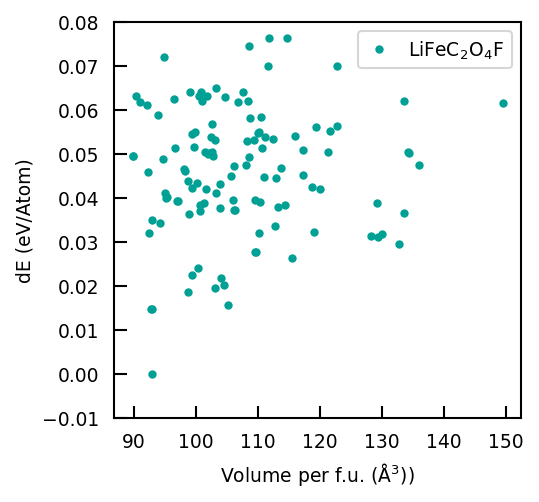

In [8]:
group = Group.objects.get(label='oxalates-f/lifeoxf-migrated-v2')
q = QueryBuilder()
q.append(Group, filters={'id': group.id})
q.append(Node, tag='root', with_group=Group)
q.append(Dict, tag='misc', project=['attributes.energy_per_atom', 'attributes.volume_per_fu'])
q.append(Dict, with_outgoing='root', project=['attributes.metadata.struct_name', 'attributes.metadata.project_name'])
q.append(StructureData, with_incoming='root', project=['*'])

plotdf = pd.DataFrame(q.all(), columns=['energy', 'volume', 'label', 'project_name', 'relaxed']).sort_values('energy')
plotdf['energy'] -= plotdf['energy'].min() 


plt.plot(plotdf.volume, plotdf.energy, '.', label=r'$\mathrm{LiFeC_2O_4F}$')
plt.ylim(-0.010, 0.080)
plt.xlabel('Volume per f.u. ($\mathrm{\AA^3}$))')
plt.ylabel('dE (eV/Atom)')
plt.legend()
plt.savefig('lifeoxf-HvsV.svg')